In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import svm

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The skle

In [2]:
# load dataset
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Final_COP\TrainN.csv") 
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [3]:
X_train = dataset.drop(['PHQ'],axis=1).values #features = X arrays 
y_train = dataset['PHQ'].values #labels = y arrays

In [4]:
# load dataset
datasetT = pd.read_csv(r"C:\Users\HP\Desktop\Final_COP\TestN.csv") 
datasetT = datasetT.drop('Unnamed: 0', axis = 1)

In [5]:
X_test = datasetT.drop(['PHQ'],axis=1).values #features = X arrays 
y_test = datasetT['PHQ'].values #labels = y arrays

In [131]:
#Train
rfc = RandomForestClassifier(
                       class_weight='balanced_subsample',max_features=  0.4934, min_samples_split=50,
                       n_estimators=1927
                       )

Validation data AUC:  0.7161199095022625
Average precision-recall score: 0.79


Text(0.5,1,'2-class Precision-Recall curve: AP=0.79')

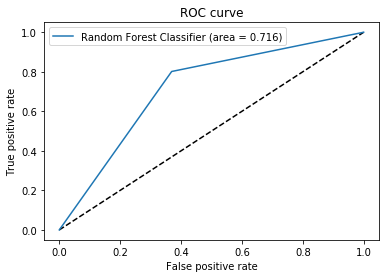

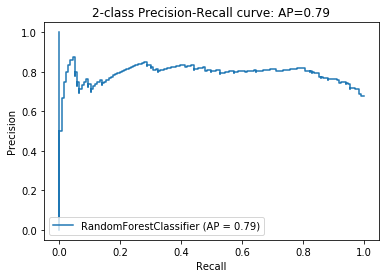

In [132]:
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)


fpr, tpr, thresholds_keras = roc_curve(y_test,ypred)
auc = auc(fpr, tpr)
print('Validation data AUC: ', auc)

# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("AUC.png", dpi = 600)

In [133]:
tn, fp, fn, tp = confusion_matrix(y_test,ypred).ravel()
recall = recall_score(y_test,ypred)
specificity = (tn/(tn+fp))
fpr = (fp/(fp+tn))
fnr = (fn/(fn+tp))
precision = precision_score(y_test,ypred)
acc = accuracy_score(y_test, ypred)
roc = roc_auc_score(y_test, ypred)
f1 = f1_score(y_test, ypred)

In [134]:
print('Accuracy = %.3f' % (acc*100))
print('AUC-ROC = %.3f' % (roc*100))
print('F1-Score = %.3f' % (f1*100))
print('Precision = %.3f' % (precision*100))
print('Sensitivity = %.3f' % (recall*100))
print('Specificity = %.3f' % (specificity*100))
print('False Positive Rate = %.3f' % (fpr*100))
print('False Negative Rate = %.3f' % (fnr*100))

Accuracy = 74.627
AUC-ROC = 71.612
F1-Score = 81.041
Precision = 81.955
Sensitivity = 80.147
Specificity = 63.077
False Positive Rate = 36.923
False Negative Rate = 19.853


In [108]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        65
           1       0.81      0.81      0.81       136

    accuracy                           0.74       201
   macro avg       0.70      0.70      0.70       201
weighted avg       0.74      0.74      0.74       201



In [109]:
confusion_matrix(y_test, ypred)

array([[ 39,  26],
       [ 26, 110]], dtype=int64)

In [8]:
n_folds = 10
acc_scores, roc_scores, f1_scores, recall_scores, specificity_scores, precision_scores, fprS, fnrS = [],[],[],[],[],[],[],[]
for x in range(n_folds):
    
    rfc = RandomForestClassifier(
                       class_weight='balanced_subsample',max_features=  0.4934, min_samples_split=50,
                       n_estimators=1927
                       )

    rfc.fit(X_train, y_train)
    ypred = rfc.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_test,ypred).ravel()
    recall = recall_score(y_test,ypred)
    specificity = (tn/(tn+fp))
    fpr = (fp/(fp+tn))
    fnr = (fn/(fn+tp))
    precision = precision_score(y_test,ypred)
    acc = accuracy_score(y_test, ypred)
    roc = roc_auc_score(y_test, ypred)
    f1 = f1_score(y_test, ypred)

    acc_scores.append(acc)
    roc_scores.append(roc)
    f1_scores.append(f1)
    recall_scores.append(recall)
    specificity_scores.append(specificity)
    precision_scores.append(precision)
    fprS.append(fpr)
    fnrS.append(fnr)

print('Estimated Accuracy %.3f (%.3f)' % (np.mean(acc_scores), np.std(acc_scores)))
print('Estimated AUC-ROC = %.3f (%.3f)' % (np.mean(roc_scores), np.std(roc_scores)))
print('Estimated F1-Score = %.3f (%.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
print('Estimated Sensitivity = %.3f (%.3f)' % (np.mean(recall_scores), np.std(recall_scores)))
print('Estimated Specificity = %.3f (%.3f)' % (np.mean(specificity_scores), np.std(specificity_scores)))
print('Estimated Precision Score %.3f (%.3f)' % (np.mean(precision_scores), np.std(precision_scores)))
print('Estimated False Positive Rate %.3f (%.3f)' % (np.mean(fprS), np.std(fprS)))
print('Estimated False Negative Rate %.3f (%.3f)' % (np.mean(fnrS), np.std(fnrS)))

Estimated Accuracy 0.739 (0.007)
Estimated AUC-ROC = 0.705 (0.009)
Estimated F1-Score = 0.806 (0.005)
Estimated Sensitivity = 0.802 (0.007)
Estimated Specificity = 0.608 (0.017)
Estimated Precision Score 0.811 (0.007)
Estimated False Positive Rate 0.392 (0.017)
Estimated False Negative Rate 0.198 (0.007)
